# Evaluation of Training Data Size and Class Imbalance

### Set up - Imports and data preprocessing

In [1]:
# Import statements
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

import time

import data_processing as dp 
import model_selection as ms 
import model_files as fm
import graph_production as gp

from scapy.all import *

import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_validate
import statistics as s




In [16]:
trainFile = rdpcap('data/timestamps/training45m.pcapng')
labelFile = fm.toList('data/timestamps/training45mClassEDITED.txt') # generate target list

cleanTestFile = rdpcap('data/timestamps/cleanTest.pcapng')
cleanTestLabelFile = fm.toList('data/timestamps/cleanTestClass.txt')

testFile = rdpcap('data/timestamps/anomaliesTest.pcapng')
testLabelFile = fm.toList('data/timestamps/anomaliesTestClass.txt')

In [3]:
gen_times = []

s = time.process_time()
x60s, y60s = dp.timestamps(trainFile, labelFile, 60)
gen_times.append(time.process_time() - s)
s = time.process_time()

x45s, y45s = dp.timestamps(trainFile, labelFile, 45)
gen_times.append(time.process_time() - s)
s = time.process_time()

x30s, y30s = dp.timestamps(trainFile, labelFile, 30)
gen_times.append(time.process_time() - s)
s = time.process_time()

x15s, y15s = dp.timestamps(trainFile, labelFile, 15)
gen_times.append(time.process_time() - s)
s = time.process_time()

x10s, y10s = dp.timestamps(trainFile, labelFile, 10)
gen_times.append(time.process_time() - s)
s = time.process_time()

x5s, y5s = dp.timestamps(trainFile, labelFile, 5)
gen_times.append(time.process_time() - s)
s = time.process_time()

x2s, y2s = dp.timestamps(trainFile, labelFile, 2)
gen_times.append(time.process_time() - s)
s = time.process_time()

x1s, y1s = dp.timestamps(trainFile, labelFile, 1)
gen_times.append(time.process_time() - s)
s = time.process_time()

xhalfs, yhalfs = dp.timestamps(trainFile, labelFile, 0.5)
gen_times.append(time.process_time() - s)
s = time.process_time()

151535
151535
151535
151535
151535
151535
151535
151535
151535


## Plot 1 - Time to generate feature sets

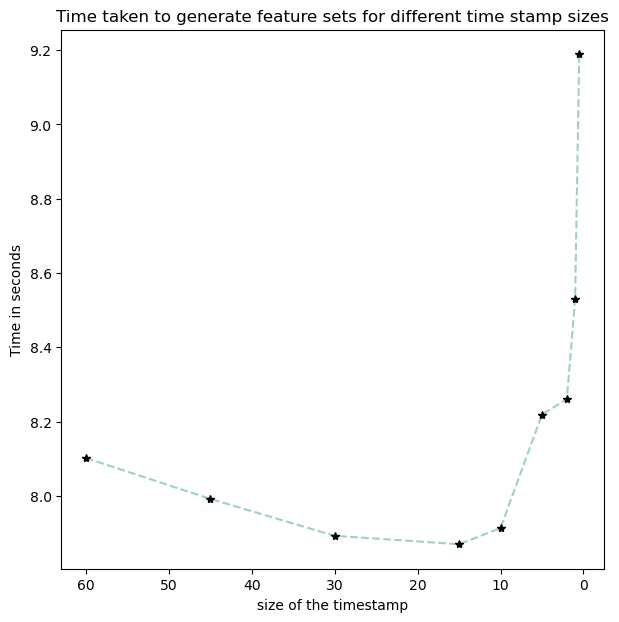

In [5]:
size_times = [60, 45, 30, 15, 10, 5, 2, 1, 0.5]

fig = plt.figure(figsize=(7, 7))
# Create an axes object
ax = plt.axes()
# Plotting the figure
plt.plot(size_times, gen_times, color="#9DD1C7", ls='--', marker='*', markeredgecolor='k', markerfacecolor='k', mouseover=True)
# Defining the label along the x-axis
plt.xlabel("size of the timestamp")
# Defining the label along the y-axis
plt.ylabel("Time in seconds")
# Defining the title of the plot
plt.title("Time taken to generate feature sets for different time stamp sizes")
ax.invert_xaxis()
# Displaying the plot
plt.show()

In [6]:
labels = [y60s, y45s, y30s, y15s, y10s, y5s, y2s, y1s, yhalfs]

x_data = [x60s, x45s, x30s, x15s, x10s, x5s, x2s, x1s, xhalfs]

## Plot 2 - Class imbalance for timestamps

In [7]:
normal = []
abnormal = []
for item in labels:
	n, a = gp.class_balance_binary(item)
	normal.append(n)
	abnormal.append(a)

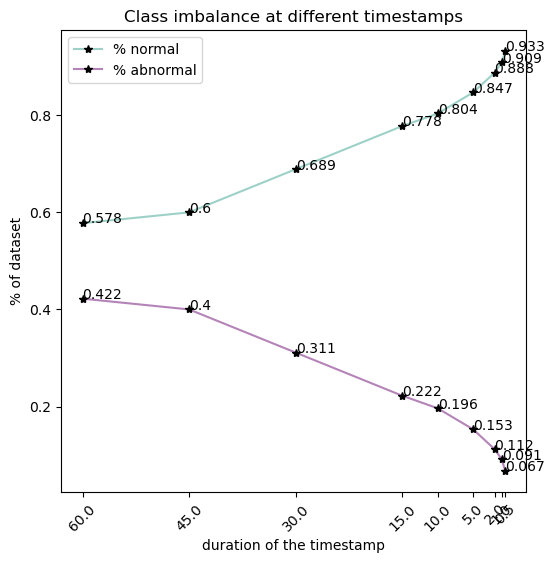

In [8]:

fig = plt.figure(figsize=(6,6))
# Create an axes object
ax = plt.axes()
# Plotting the figure
plt.plot(size_times, normal, label='% normal', color="#9DD1C7", ls='-', marker='*', markeredgecolor='k', markerfacecolor='k', mouseover=True)
plt.plot(size_times, abnormal, label='% abnormal', color="#B484B9", ls='-', marker='*', markeredgecolor='k', markerfacecolor='k', mouseover=True)
# Defining the label along the x-axis
plt.xlabel("duration of the timestamp")
# Defining the label along the y-axis
plt.ylabel("% of dataset")
# Defining the title of the plot
plt.title("Class imbalance at different timestamps")

n, a = [], []

for i in range(len(normal)):
	n.append(round(normal[i], 3))
	
	a.append(round(abnormal[i], 3))

normal = n
abnormal = a

for i in range(len(normal)):
	ax.text(size_times[i], normal[i], normal[i], size=10)
	ax.text(size_times[i], abnormal[i], abnormal[i], size=10)
plt.xticks(size_times, rotation=45)
ax.invert_xaxis()
ax.legend()
# Displaying the plot
plt.show()

## Performance at time stamps

> for the purpose of this evaluation 2 models are considered to compare performance. This will encompass a range of different model methods


In [15]:
def generatePipeline():
	pipelines = []
	pipelines.append(('SGDC', (Pipeline([('SGDC', SGDClassifier())]))))
	pipelines.append(('DecisionTree', (Pipeline([('DecisionTree', DecisionTreeClassifier())]))))
	return(pipelines)

def trainModels(X,Y,k=5):
	pipelines = generatePipeline()
	model_names = []
	results = []
	for pipe, model in pipelines:
		kfold = KFold(n_splits=k)
		# https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
		crossv_results =  cross_validate(model, X, Y, cv=kfold, scoring=['balanced_accuracy',
						 'f1', 'precision', 'recall'])

		results.append(crossv_results)
		model_names.append(pipe)
	
	
	return(results, pipelines)

results = []
pipelines = []


for i in range(len(x_data)):
	x = x_data[i]
	y = labels[i]
	
	r, p = trainModels(x, y)
	results.append(r)
	pipelines.append(p)

print(pipelines[0][1])

('DecisionTree', Pipeline(steps=[('DecisionTree', DecisionTreeClassifier())]))
